  We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience. 
  As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should: 
  1. Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id. 
  2. What are the main factors that drive employee churn? Do they make sense? Explain your findings. 
  3. If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('Employee_Rentation.csv')
df.head()

,Unnamed: 0,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,2,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,3,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,4,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,5,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [7]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09


In [8]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

* Lots of missing values in "quit_date" variable, we can confidently guess these missing values indicate the employees are still in the companies

# Task01:
* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
* **Create Table for day, employee_headcount, and company_id**

In [9]:
# Define useful information
time_range = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(df['company_id'].unique())

In [10]:
day = []
company = []
headcount = []

for d in time_range:
    for c in unique_company:
        total_join = len(df[(df['join_date'] <= d) & (df['company_id']==c)])
        total_quit = len(df[(df['quit_date'] <= d) & (df['company_id']==c)])
        total_headcount = (total_join - total_quit)
        day.append(d)
        company.append(c)
        headcount.append(total_headcount)
        

# create a new dataframe
new_df = pd.DataFrame({'day':day, 'company':company, 'headcount':headcount})

## Task02:
* What are the main factors that drive employee churn? Do they make sense? Explain your findings.


### - Feature Engineering

In [13]:
df_quit = df.loc[~df['quit_date'].isnull(),:]
df_quit['day_before_quit'] = np.array(list(map(lambda x: x.days, df_quit['quit_date'] - df_quit['join_date'])))


In [14]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,day_before_quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578


### - EDA

#### (1) work day

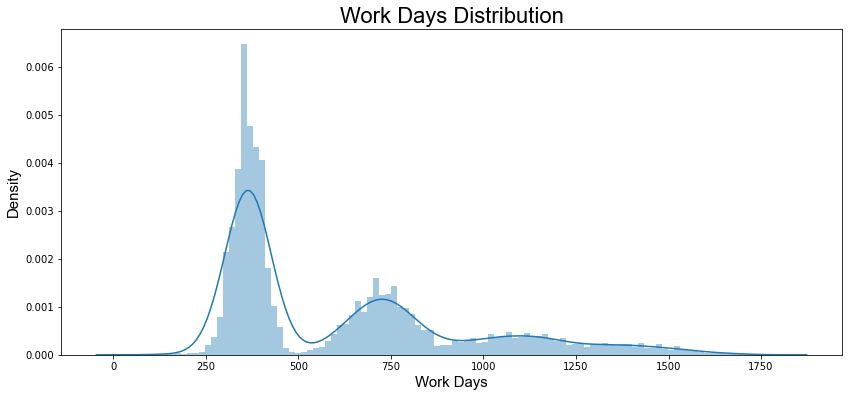

In [15]:
# work days distribution
fig, ax = plt.subplots(figsize=(14,6))

sns.distplot(df_quit['day_before_quit'],bins = 100,kde = True)

plt.title('Work Days Distribution', fontdict={'fontname': 'Arial', 'fontsize': 22})
plt.xlabel('Work Days', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Density', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Lots of employees quit after around 1 year(365 days)

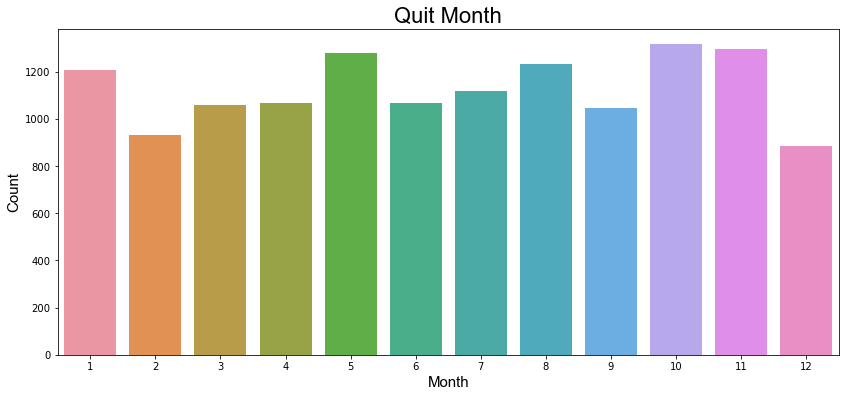

In [16]:
# quit month
quit_month = df_quit['quit_date'].apply(lambda x: x.month)

fig, ax = plt.subplots(figsize=(14,6))

sns.countplot(quit_month)

plt.title('Quit Month', fontdict={'fontname': 'Arial', 'fontsize': 22})
plt.xlabel('Month', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Lots of employees quit in **October** and **November**
* **December** shows the lowest number of employees quit, but in **January** the number of employees quit increase a lot

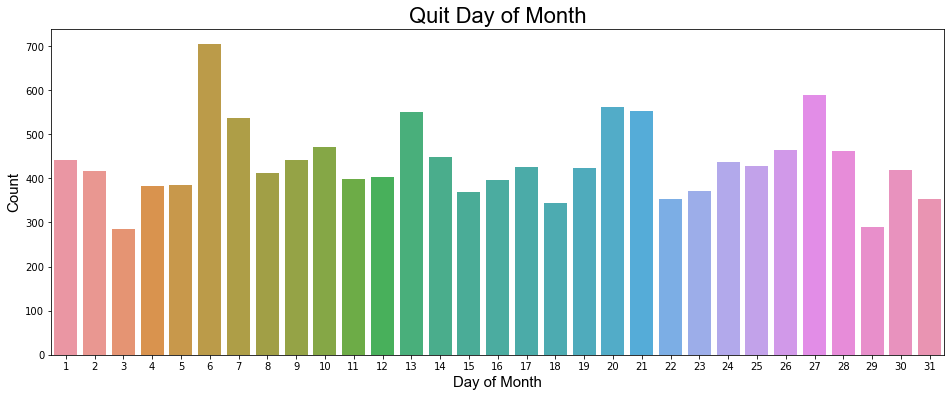

In [17]:
# quit day of month
quit_day = df_quit['quit_date'].apply(lambda x: x.day)

fig, ax = plt.subplots(figsize=(16,6))

sns.countplot(quit_day)

plt.title('Quit Day of Month', fontdict={'fontname': 'Arial', 'fontsize': 22})
plt.xlabel('Day of Month', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Many employees quit on the **6th** of month, maybe they get the salary on the 5th

In [18]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,day_before_quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578


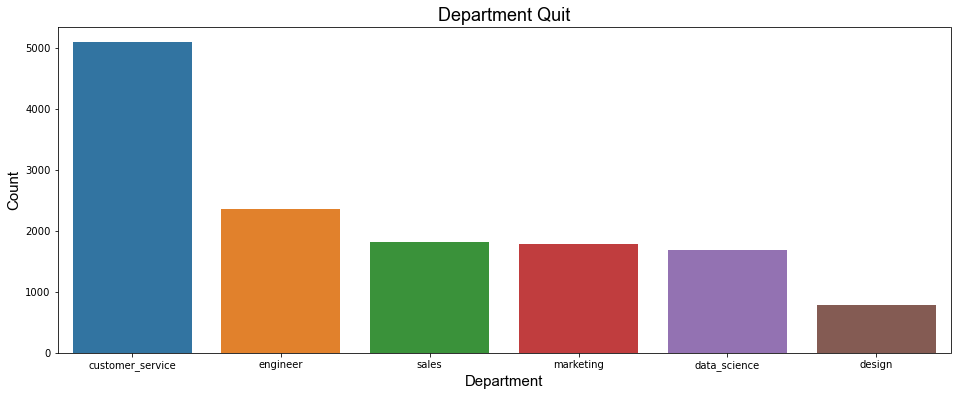

In [19]:
# department
fig, ax = plt.subplots(figsize=(16,6))

sns.countplot(df_quit['dept'], order = df_quit['dept'].value_counts().index)

plt.title('Department Quit', fontdict={'fontname': 'Arial', 'fontsize': 18})
plt.xlabel('Department', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Many employees who quit come from **customer service**

In [20]:
# seniority: number of yrs of work experience when hired

# remove outliers
df_quit['seniority'] = df_quit['seniority'][(df_quit['seniority']<50)]

# segment the 'seniority'
df_quit['seniority_level'] = df_quit['seniority'].apply(lambda x: 5 if x <= 5 else x)
df_quit['seniority_level'] = df_quit['seniority_level'].apply(lambda x: 10 if  5 < x <= 10 else x)
df_quit['seniority_level'] = df_quit['seniority_level'].apply(lambda x: 15 if  10 < x <= 15 else x)
df_quit['seniority_level'] = df_quit['seniority_level'].apply(lambda x: 20 if  15 < x <= 20 else x)
df_quit['seniority_level'] = df_quit['seniority_level'].apply(lambda x: 25 if  20 < x <= 25 else x)
df_quit['seniority_level'] = df_quit['seniority_level'].apply(lambda x: 30 if  25 < x <= 30 else x)

df_quit = df_quit.dropna(subset=['seniority_level'])

df_quit['seniority_level'] =  df_quit['seniority_level'].map({5: '0-5', 10: '6-10', 15:'11-15', 20:'16-20', 25:'21-25', 30:'26-30'})


In [21]:
df_quit

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,day_before_quit,seniority_level
0,13021.0,7,customer_service,28.0,89000.0,2014-03-24,2015-10-30,585,26-30
1,825355.0,7,marketing,20.0,183000.0,2013-04-29,2014-04-04,340,16-20
3,662910.0,7,customer_service,20.0,115000.0,2012-05-14,2013-06-07,389,16-20
4,256971.0,2,data_science,23.0,276000.0,2011-10-17,2014-08-22,1040,21-25
5,509529.0,4,data_science,14.0,165000.0,2012-01-30,2013-08-30,578,11-15
...,...,...,...,...,...,...,...,...,...
24690,785497.0,1,sales,24.0,218000.0,2011-02-01,2015-01-23,1452,21-25
24692,4881.0,1,data_science,28.0,249000.0,2012-02-27,2013-04-26,424,26-30
24695,63273.0,1,data_science,5.0,172000.0,2012-05-01,2015-06-26,1151,0-5
24696,94644.0,6,marketing,7.0,88000.0,2012-01-26,2013-02-01,372,6-10


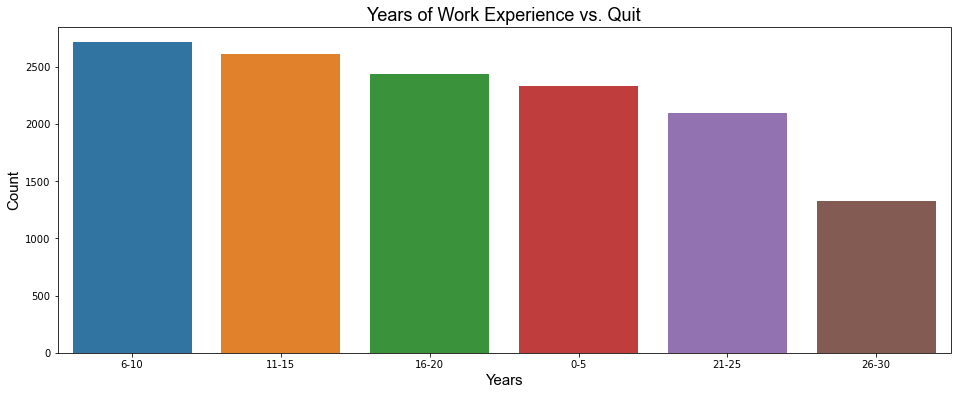

In [22]:
# seniority plot
fig, ax = plt.subplots(figsize=(16,6))

sns.countplot(df_quit['seniority_level'], order = df_quit['seniority_level'].value_counts().index)

plt.title('Years of Work Experience vs. Quit', fontdict={'fontname': 'Arial', 'fontsize': 18})
plt.xlabel('Years', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Empolyees with 6-15 years of work experiences are more likely to quit

In [23]:
# segment the 'salary'
df_quit['salary_level'] = df_quit['salary'].apply(lambda x: 5 if x <= 50000 else x)
df_quit['salary_level'] = df_quit['salary_level'].apply(lambda x: 10 if  50000 < x <= 100000 else x)
df_quit['salary_level'] = df_quit['salary_level'].apply(lambda x: 15 if  100000 < x <= 150000 else x)
df_quit['salary_level'] = df_quit['salary_level'].apply(lambda x: 20 if  150000 < x <= 200000 else x)
df_quit['salary_level'] = df_quit['salary_level'].apply(lambda x: 25 if  200000 < x <= 250000 else x)
df_quit['salary_level'] = df_quit['salary_level'].apply(lambda x: 30 if  250000 < x  else x)

df_quit = df_quit.dropna(subset=['salary_level'])

df_quit['salary_level'] =  df_quit['salary_level'].map({5: '0-50k', 10: '50-100k', 15:'100-150k', 20:'150-200k', 25:'200-250k', 30:'>250k'})


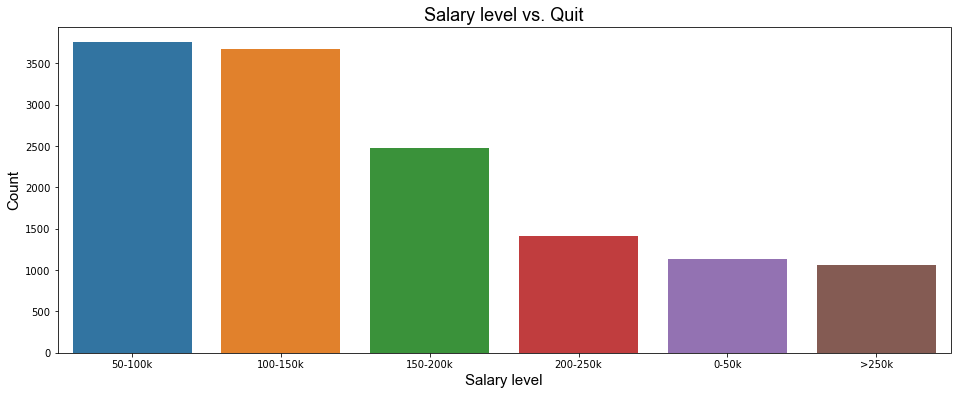

In [24]:
# salary_level plot
fig, ax = plt.subplots(figsize=(16,6))

sns.countplot(df_quit['salary_level'], order = df_quit['salary_level'].value_counts().index)

plt.title('Salary level vs. Quit', fontdict={'fontname': 'Arial', 'fontsize': 18})
plt.xlabel('Salary level', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Arial', 'fontsize': 15})

plt.show()

* Empolyees with 50-150k salary are more likely to quit

## Task03: 
* If you could add to this data set just one variable that could help explain employee churn, what would that be?

## Build Decision Tree Model
* Create the features of employees who quit in 417 days (the median of days a former employee stayed with the company)
* Check how Tree model split the variables, find out the important factor affecting employees leave their job

In [25]:
# create a binary variable for employee quits or not
df_quit['quit'] = df_quit['day_before_quit'].apply(lambda x: 1 if x < 417 else 0)

In [26]:
# Label encoder for 'dept' variable
lbe = LabelEncoder()
df_quit['dept_number'] = lbe.fit_transform(df_quit['dept'])

df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,day_before_quit,seniority_level,salary_level,quit,dept_number
0,13021.0,7,customer_service,28.0,89000.0,2014-03-24,2015-10-30,585,26-30,50-100k,0,0
1,825355.0,7,marketing,20.0,183000.0,2013-04-29,2014-04-04,340,16-20,150-200k,1,4
3,662910.0,7,customer_service,20.0,115000.0,2012-05-14,2013-06-07,389,16-20,100-150k,1,0
4,256971.0,2,data_science,23.0,276000.0,2011-10-17,2014-08-22,1040,21-25,>250k,0,1
5,509529.0,4,data_science,14.0,165000.0,2012-01-30,2013-08-30,578,11-15,150-200k,0,1


In [27]:
# X y
X = df_quit[['dept_number', 'seniority', 'salary']]
y = df_quit['quit']

In [33]:
# Build decision tree
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=22)
model = model.fit(X=X, y=y)

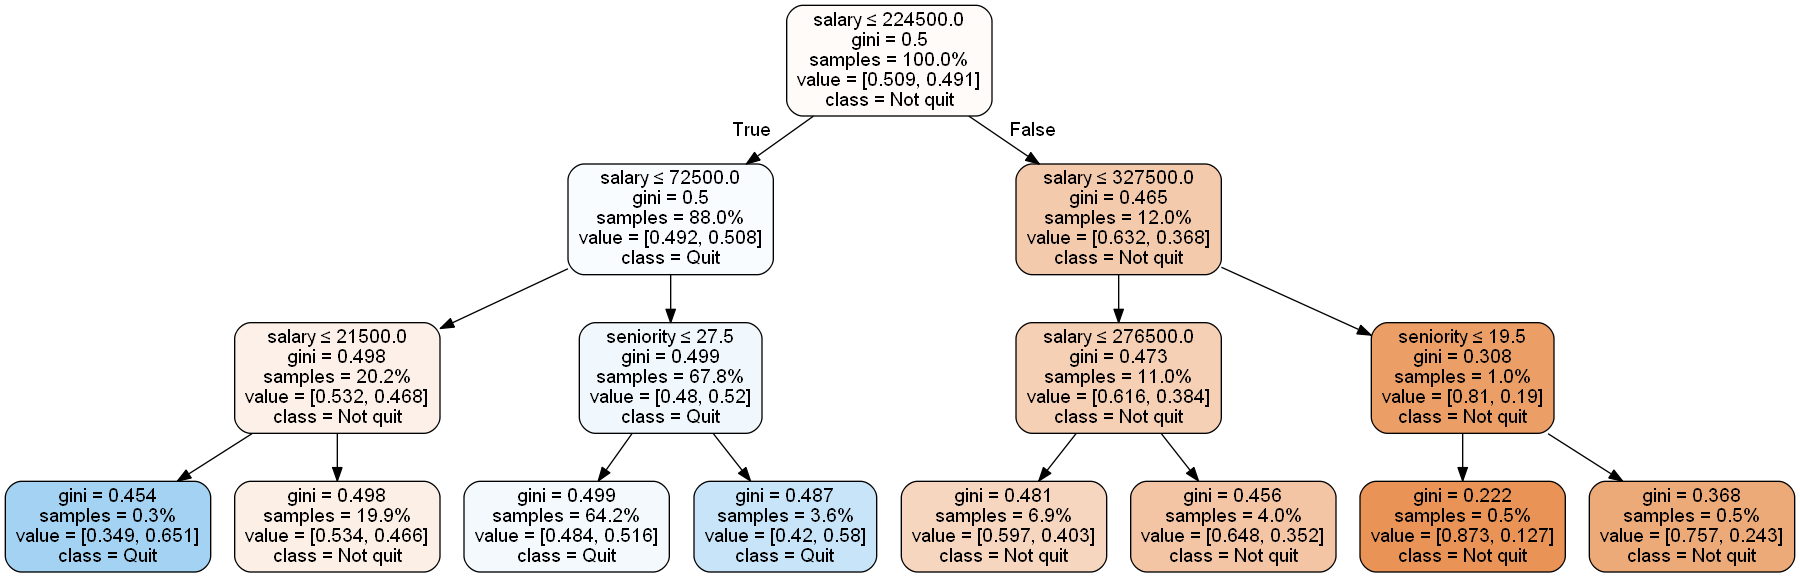

In [36]:
# tree plot

from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = X.columns, class_names=['Not quit', 'Quit'], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree_plot.png')
Image(graph.create_png())

         index  Importance
0       salary    0.945436
1    seniority    0.054564
2  dept_number    0.000000


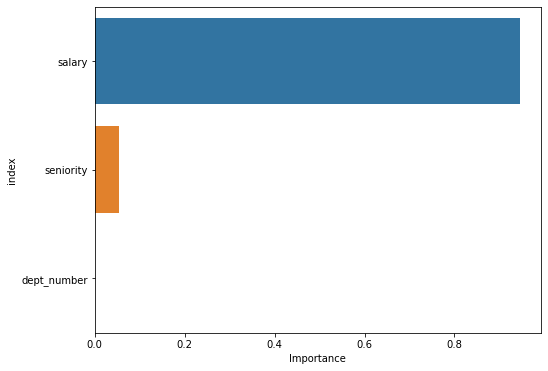

In [37]:
# get feature importances
feat_import = pd.Series(model.feature_importances_, index=X.columns)
feat_import = feat_import.sort_values(ascending=False).reset_index()
feat_import = feat_import.rename(columns={0: 'Importance'})

fig, ax = plt.subplots(figsize=(8, 6))

print(feat_import)
sns.barplot(x='Importance', y='index', data=feat_import)
plt.show()

## Conclusion

* **Salary** is the main factor affecting whether an employee resigns or not
* If we could add to this dataset one variable that could help explain employee churn, it will be **the next company salary of these employees**, so that we can make a comparison
* Employees are more likely to quit **at the end and beginning of year**. Which makes sense, peopel tend to work at least one yer to experience company's culture and get the year bonus(e.g.,equity option)
* Empolyees with **50-150k salary** are more likely to quit. Empolyees with lower salary(<50k) maybe don't have too many options to change company. And empolyees with higher salary(>150k) may satisfy with the current salary.
* Empolyees come from **customer service** are more likely to quit. Companies should pay special attention to this group of employees.